# Libraries

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn
from google.colab import drive


# Mount the G Drive to read the dataset

In [ ]:
drive.mount('/content/drive/')

In [3]:
train_df = pd.read_csv("/content/drive/MyDrive/Dataset/MNIST_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Dataset/MNIST_test.csv")

# Data Analysis

In [5]:
# Data Analysis
print("Training Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)


Training Data Shape: (60000, 787)
Test Data Shape: (10000, 787)


In [6]:
print("Training Data Info:")
print(train_df.info())


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 787 entries, Unnamed: 0 to 783
dtypes: int64(787)
memory usage: 360.3 MB
None


In [7]:
print("Training Data Description:")
print(train_df.describe())

Training Data Description:
         Unnamed: 0         index        labels        0        1        2  \
count  60000.000000  60000.000000  60000.000000  60000.0  60000.0  60000.0   
mean   29999.500000  29999.500000      4.453933      0.0      0.0      0.0   
std    17320.652413  17320.652413      2.889270      0.0      0.0      0.0   
min        0.000000      0.000000      0.000000      0.0      0.0      0.0   
25%    14999.750000  14999.750000      2.000000      0.0      0.0      0.0   
50%    29999.500000  29999.500000      4.000000      0.0      0.0      0.0   
75%    44999.250000  44999.250000      7.000000      0.0      0.0      0.0   
max    59999.000000  59999.000000      9.000000      0.0      0.0      0.0   

             3        4        5        6  ...           774           775  \
count  60000.0  60000.0  60000.0  60000.0  ...  60000.000000  60000.000000   
mean       0.0      0.0      0.0      0.0  ...      0.200433      0.088867   
std        0.0      0.0      0.0    

# Checking Null Values

In [8]:
# Check for any missing values
print("Missing Values in Training Data:")
print(train_df.isnull().sum().sum())

Missing Values in Training Data:
0


# Plotting the sample images of the digits

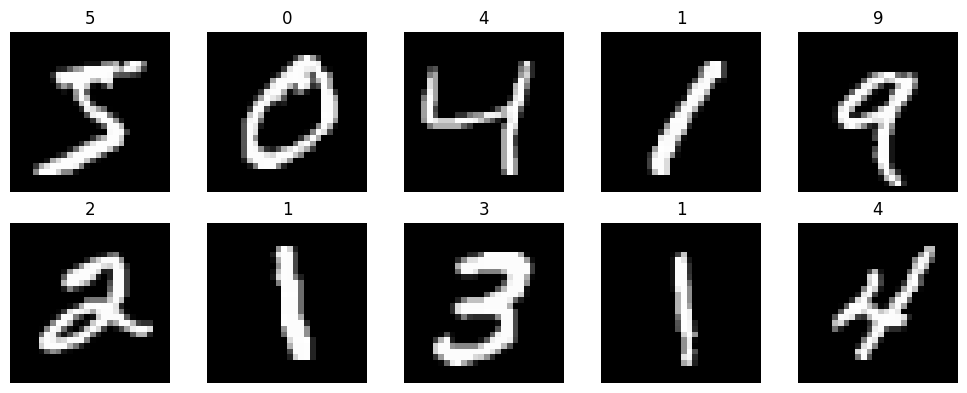

In [9]:
def plot_samples(dataframe, n_samples=10):
    plt.figure(figsize=(10, 4))
    for i in range(n_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(dataframe.iloc[i, 3:].values.reshape(28, 28), cmap='gray')
        plt.title(dataframe.iloc[i]['labels'])
        plt.axis('off')
    plt.tight_layout()
    plt.show()


plot_samples(train_df, n_samples=10)

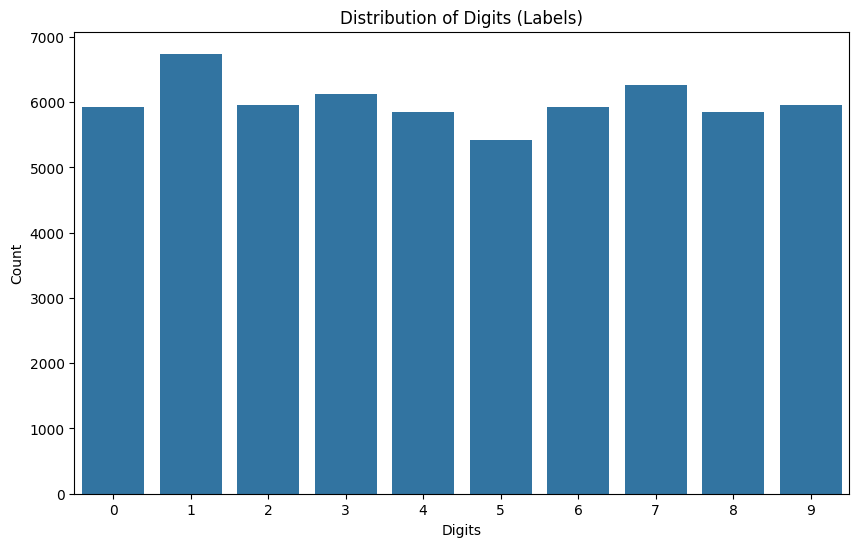

In [14]:
# Distribution of Labels
plt.figure(figsize=(10, 6))
sns.countplot(x='labels', data=train_df)
plt.title("Distribution of Digits (Labels)")
plt.xlabel("Digits")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Dropping unwanted features in the dataframe


In [15]:
X_train = train_df.drop(columns=['Unnamed: 0', 'index', 'labels']).values
y_train = train_df['labels'].values

X_test = test_df.drop(columns=['Unnamed: 0', 'index', 'labels']).values
y_test = test_df['labels'].values


In [18]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
y_train

array([5, 0, 4, ..., 5, 6, 8])



# Normalisation

In [20]:
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Convert into the numpy's

In [23]:
# Convert to NumPy arrays
X_train = np.array(X_train_norm)
y_train = np.array(y_train)
X_test = np.array(X_test_norm)
y_test = np.array(y_test)

#  3 Classifiers
## 1. GaussNB: Naive Bayes Classifier
## 2. GaussBayes: Non - Naive Bayes
## 3. KNNClassifier: K Nearest Neighbour Classifier


In [25]:
class GaussNB:
    def fit(self, X, y, epsilon=1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        self.K = set(y.astype(int))

        for k in self.K:
            X_k = X[y == k]
            self.likelihoods[k] = {"mean": X_k.mean(axis=0), "cov": X_k.var(axis=0) + epsilon}
            self.priors[k] = len(X_k) / len(X)

    def predict(self, X):
        N, D = X.shape
        P_hat = np.zeros((N, len(self.K)))

        for k, l in self.likelihoods.items():
            P_hat[:, k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])

        return P_hat.argmax(axis=1)

class GaussBayes:
    def fit(self, X, y, epsilon=1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        self.K = set(y.astype(int))

        for k in self.K:
            X_k = X[y == k, :]
            N_k, D = X_k.shape
            mu_k = X_k.mean(axis=0)

            self.likelihoods[k] = {
                "mean": mu_k,
                "cov": (1 / (N_k - 1)) * np.matmul((X_k - mu_k).T, (X_k - mu_k)) + epsilon * np.identity(D)
            }
            self.priors[k] = len(X_k) / len(X)

    def predict(self, X):
        N, D = X.shape
        P_hat = np.zeros((N, len(self.K)))
        for k, l in self.likelihoods.items():
            P_hat[:, k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])

        return P_hat.argmax(axis=1)

class KNNClassifier:
    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X, K, epsilon=1e-3):
        N = len(X)
        y_hat = np.zeros(N)

        for i in range(N):
            dist2 = np.sum(((self.X - X[i]) ** 2), axis=1)
            idxt = np.argsort(dist2)[:K]
            gamma_k = 1 / (np.sqrt(dist2[idxt] + epsilon))
            y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()

        return y_hat

# Testing with the epsilon values

In [26]:
# epsilon values to test
epsilon_values = [1e-3, 1e-2, 1e-1, 1e0]
results = []

In [27]:
for epsilon in epsilon_values:
    nb_classifier = GaussNB()
    nb_classifier.fit(X_train, y_train, epsilon)
    y_pred_nb = nb_classifier.predict(X_test)
    accuracy_nb = np.mean(y_pred_nb == y_test)
    results.append({"Classifier": "Naive Bayes", "Epsilon": epsilon, "Accuracy": accuracy_nb})

    non_nb_classifier = GaussBayes()
    non_nb_classifier.fit(X_train, y_train, epsilon)
    y_pred_non_nb = non_nb_classifier.predict(X_test)
    accuracy_non_nb = np.mean(y_pred_non_nb == y_test)
    results.append({"Classifier": "Non-Naive Bayes", "Epsilon": epsilon, "Accuracy": accuracy_non_nb})

    knn_classifier = KNNClassifier()
    knn_classifier.fit(X_train, y_train)
    y_pred_knn = knn_classifier.predict(X_test, K=3, epsilon=epsilon)
    accuracy_knn = np.mean(y_pred_knn == y_test)
    results.append({"Classifier": "KNN", "Epsilon": epsilon, "Accuracy": accuracy_knn})


In [28]:
# DataFrame for results
results_df = pd.DataFrame(results)

# Best Accuracy Results

In [29]:
print(results_df)

         Classifier  Epsilon  Accuracy
0       Naive Bayes    0.001    0.7746
1   Non-Naive Bayes    0.001    0.9108
2               KNN    0.001    0.9717
3       Naive Bayes    0.010    0.8141
4   Non-Naive Bayes    0.010    0.9473
5               KNN    0.010    0.9717
6       Naive Bayes    0.100    0.7791
7   Non-Naive Bayes    0.100    0.9542
8               KNN    0.100    0.9717
9       Naive Bayes    1.000    0.6791
10  Non-Naive Bayes    1.000    0.8847
11              KNN    1.000    0.9717


In [30]:
data = {
    "Epsilon": ["1e-3 (0.001)", "1e-2 (0.01)", "1e-1 (0.1)", "1e0 (1.0)"],
    "Naive Bayes": [0.7746, 0.8141, 0.7791, 0.6791],
    "Non-Naive Bayes": [0.9108, 0.9473, 0.9542, 0.8847],
    "KNN": [0.9717, 0.9717, 0.9717, 0.9717],
}

results_df = pd.DataFrame(data)
print(results_df)


        Epsilon  Naive Bayes  Non-Naive Bayes     KNN
0  1e-3 (0.001)       0.7746           0.9108  0.9717
1   1e-2 (0.01)       0.8141           0.9473  0.9717
2    1e-1 (0.1)       0.7791           0.9542  0.9717
3     1e0 (1.0)       0.6791           0.8847  0.9717


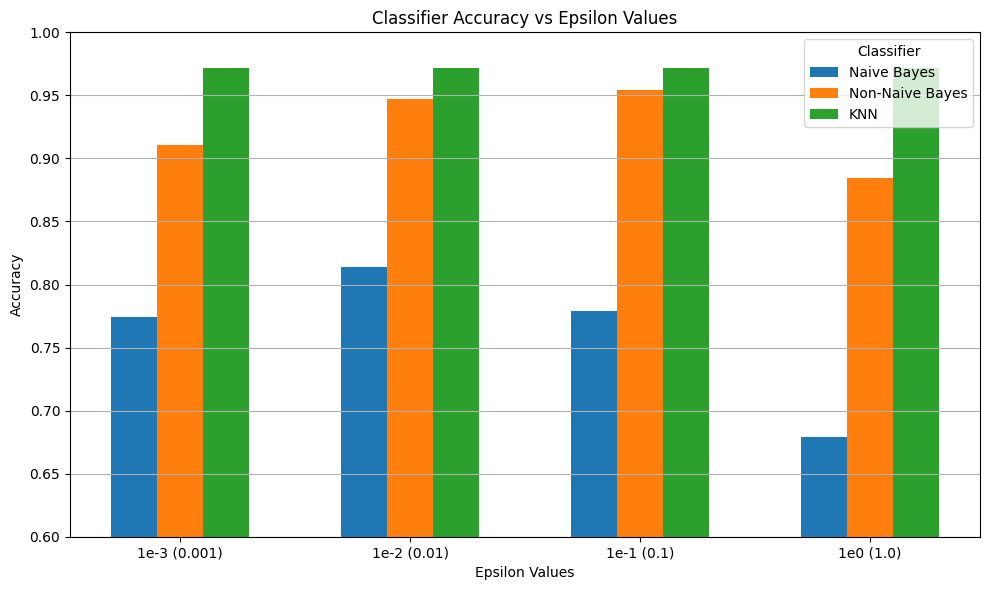

In [32]:
bar_width = 0.2

x = np.arange(len(results_df['Epsilon']))
plt.figure(figsize=(10, 6))

plt.bar(x - bar_width, results_df['Naive Bayes'], width=bar_width, label='Naive Bayes')
plt.bar(x, results_df['Non-Naive Bayes'], width=bar_width, label='Non-Naive Bayes')
plt.bar(x + bar_width, results_df['KNN'], width=bar_width, label='KNN')

plt.xlabel('Epsilon Values')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy vs Epsilon Values')
plt.xticks(x, results_df['Epsilon'])
plt.ylim(0.6, 1)
plt.grid(axis='y')
plt.legend(title='Classifier')
plt.tight_layout()
plt.show()